We train the perceptron with the following data:

Input: [1 2] → Expected output: 0
Input: [2 3] → Expected output: 0
Input: [3 1] → Expected output: 0
Input: [6 5] → Expected output: 1
Input: [7 8] → Expected output: 1
Input: [8 7] → Expected output: 1
Predictions for the inputs: [0 0 0 1 1 1]
Let's visualize the decision boundary


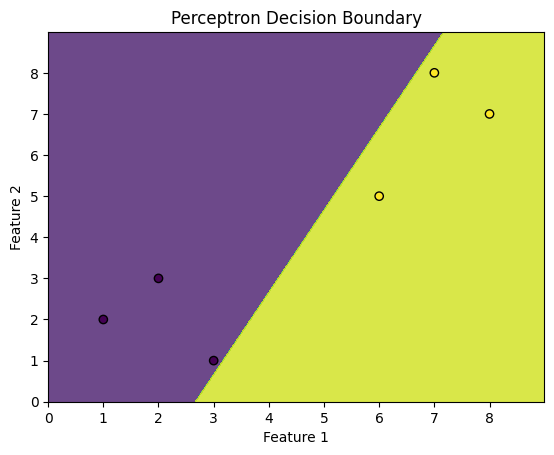

We train the perceptron again with the following data:

Input: [0 0] → Expected output: 0
Input: [0 1] → Expected output: 1
Input: [1 0] → Expected output: 1
Input: [1 1] → Expected output: 0
Let's visualize the decision boundary


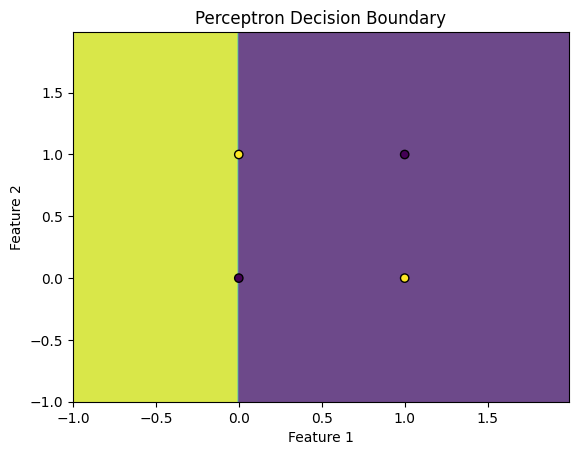

Make predictions with new inputs on both models and observe the results.



In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate  # Learning rate
        self.n_iters = n_iters   # Number of iterations
        self.weights = None      # Perceptron weights
        self.bias = None         # Perceptron bias

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # 1. Initialize weights and bias to zero
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 2. Train the perceptron
        # Repeat for n_iters iterations
        for _ in range(self.n_iters):
            # Iterate through each training example
            for i in range(n_samples):
                # Linear output (z = w1*x1 + w2*x2 + ... + b)
                linear_output = np.dot(X[i], self.weights) + self.bias

                # Apply activation function (step function)
                y_pred = 1 if linear_output >= 0 else 0

                # Compute error (true label - prediction)
                error = y[i] - y_pred

                # Update weights and bias
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error

    def predict(self, X):
        # Compute linear output for each example
        linear_output = np.dot(X, self.weights) + self.bias

        # Apply activation function (step function)
        return np.where(linear_output >= 0, 1, 0)

# Example data (linearly separable)
X = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 8], [8, 7]])
y = np.array([0, 0, 0, 1, 1, 1])

print("We train the perceptron with the following data:\n")

for entrada, salida in zip(X, y):
    print(f"Input: {entrada} → Expected output: {salida}")

# Create and train the perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X, y)

# Predict with the trained perceptron
predictions = perceptron.predict(X)
print("Predictions for the inputs:", predictions)

print("Let's visualize the decision boundary")
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(X, y, perceptron)

# XOR data (not linearly separable)
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

print("We train the perceptron again with the following data:\n")

for entrada, salida in zip(X_xor, y_xor):
    print(f"Input: {entrada} → Expected output: {salida}")

# Train perceptron with XOR data
perceptron_xor = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_xor.fit(X_xor, y_xor)

print("Let's visualize the decision boundary")
# Visualize results (the perceptron does not separate the classes correctly)
plot_decision_boundary(X_xor, y_xor, perceptron_xor)

print("Make predictions with new inputs on both models and observe the results.\n")
